# The course so far...

* Whirlwind through Python
* Filer, CLI, OO
* Plotting
* Numpy

## What is left ...

* More data processing with Pandas (today)
* Multiprocessing, generators and requests
* Graphs and PageRank
* Webscraping
* Feature engineering
* Neural networks
* Image processing
* Movement detection

* Project!

# Learning objectives

## Skills 

* Write Python scripts and programs using common language constructs in the read-eval-print-loop (REPL), “Jupyter Notebooks”, as well as separate self-contained programs. 

* Download files from the web programmatically, as well as reading most common file formats programmatically. 

* Create various types of plots programmatically to share insight into data. 

* Apply Python’s scientific libraries and some of the most prominent algorithms in data science for problem solving and complexity reduction. 

* Programmatically, process images and streams of images. 

* Automate repetitive and boring tasks for example for data collection or UI testing. 

 



## Competencies 

* collect various types of data 

* formulate problems about this data 

* implement solutions to given problem statements 

* present results on an abstract as well as technical level 

*  gain experiences in code reviews by reviewing Python code of their fellow students

## Exam
* Group presentation of 10 minutes followed by 10 minutes of questions per student (minimum 30 minutes). 

* The exam is based on a presentation of the student’s group project and it is facilitated by an interactive programming environment. Additionally, this includes a discussion of the project’s solutions with respect to the main topics of the course.
* For the main topics questions will be known to the students in advance. 

# TOC
- Datetime in python
  - Date, Time, DateTime
  - time deltas (from datetime import timedelta)
  - convert between datetime and string and vice versa
- Pandas
  - Loading and reading data
  - Series
    - 1 dimensional data structure
  - DataFrame
    - 2 dimensional data structure
    - `pandas.DataFrame( data, index, columns, dtype, copy)`
    - columns can be of different types
    - data can be lists, dicts, maps, ndarrays.

## Initialising `numpy` and `matplotlib`

In [54]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'time', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Datetime in Python

This intro to handling *dates* and *times* in Python is based on the documentation of the standard library's `datetime` module https://docs.python.org/3.6/library/datetime.html.

The datetime module supplies classes for manipulating *dates* and *times* in both simple and complex ways. While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

## Date Objects

A date object represents a date (year, month and day) in an idealized calendar, the current Gregorian calendar indefinitely extended in both directions. January 1 of year 1 is called day number 1, January 2 of year 1 is called day number 2, and so on. This matches the definition of the "proleptic Gregorian" calendar in Dershowitz and Reingold’s book Calendrical Calculations, where it is the base calendar for all computations. See the book for algorithms for converting between proleptic Gregorian ordinals and many other calendar systems. Alternatively, you can have a look at the paper describing what is extended in the book:
http://www.cs.tau.ac.il/~nachumd/papers/cc-paper.pdf

In [55]:
from datetime import date


today = date.today()
print(today)
today

2019-03-05


datetime.date(2019, 3, 5)

In [56]:
today = date(today.year, 10, 2)
today

datetime.date(2019, 10, 2)

In [57]:
next_lecture = date(today.year, 10, 9)
time_to_next_lecture = abs(next_lecture - today)
time_to_next_lecture.days

7

In [58]:
from datetime import timedelta
# see the timedelta documentation:
# https://docs.python.org/3.6/library/datetime.html#timedelta-objects

next_lecture = date(today.year, 10, 2) + timedelta(5)
time_to_next_lecture = abs(next_lecture - today)
time_to_next_lecture.days

5

In [59]:
today.strftime("%d/%m/%Y")

'02/10/2019'

In [60]:
today.strftime("%A %d. %B %Y")

'Wednesday 02. October 2019'

## Time Objects

A time object represents a (local) time of day, independent of any particular day. In our coure I will not consider times with respect to different time zones. In case you need to add information about which time zone a `time` refers, please read https://docs.python.org/3.4/library/datetime.html#tzinfo-objects.

In [61]:
from datetime import datetime, date, time


t = time(12, 10, 30)
t.isoformat()

'12:10:30'

In [62]:
print(t.strftime('%H:%M:%S'))

print('The time is {:%H:%M}.'.format(t))

12:10:30
The time is 12:10.


## Datetime Objects

In [63]:
from datetime import datetime, date, time


d = date.today()
t = time(12, 30)
datetime.combine(d, t) # todays date combined with time: 12:30

datetime.datetime(2019, 3, 5, 12, 30)

In [64]:
now = datetime.now()
print(now)
now = now.replace(microsecond=0)
print(now)

2019-03-05 15:06:03.852520
2019-03-05 15:06:03


In [65]:
datetime.utcnow()

datetime.datetime(2019, 3, 5, 14, 6, 3, 863248)

In [66]:
ic = now.isocalendar()
print('the year is {}, the week is {} and it is the {}th day'.format(ic[0], ic[1],ic[2]))
week_number = ic[1]
print(week_number)

the year is 2019, the week is 10 and it is the 2th day
10


In [67]:
now.strftime("%A, %d. %B %Y %I:%M%p")

'Tuesday, 05. March 2019 03:06PM'

In [68]:
'The {1} is {0:%d}, the {2} is {0:%B}, the {3} is {0:%I:%M%p}.'.format(now, "day", "month", "time")

'The day is 05, the month is March, the time is 03:06PM.'

In [69]:
d = datetime.strptime('10 Jun 2010', '%d %b %Y')
print(d)
d.strftime('%d-%m-%Y week: %U')

2010-06-10 00:00:00


'10-06-2010 week: 23'

## Timedeltas

A `timedelta` object represents a duration, the difference between two dates or times.

In [70]:
from datetime import timedelta


d = timedelta(microseconds=5)
(d.days, d.seconds, d.microseconds)

(0, 0, 5)

In [71]:
timedelta(hours=-5)

datetime.timedelta(days=-1, seconds=68400)

### Operations with `timedelta`s

In [72]:
year_as_delta = timedelta(days=365)
print('year_as_delta:',year_as_delta)
another_year_delta = timedelta(weeks=40, days=84, hours=23, minutes=50, seconds=600)  # adds up to 365 days

year_as_delta: 365 days, 0:00:00


In [73]:
last_year = datetime.now() - year_as_delta
next_year = datetime.now() - year_as_delta + (2 *another_year_delta)
print(last_year)
print(next_year)

2018-03-05 15:06:03.940243
2020-03-04 15:06:03.940299


In [74]:
two_year_delta = next_year - last_year
print('The two year difference is equivalent to {} days or to {} seconds'.format(
    two_year_delta.days, two_year_delta.total_seconds()))

The two year difference is equivalent to 730 days or to 63072000.000056 seconds


## Converting Strings to Times and Vice Versa

In [75]:
from datetime import datetime


datetime.now().isoformat()

'2019-03-05T15:06:03.958220'

In [76]:
dt = datetime.strptime('21/11/06 16:30', '%d/%m/%y %H:%M')
dt

datetime.datetime(2006, 11, 21, 16, 30)

In [77]:
dt.strftime('%y-%m-%d %H:%M')

'06-11-21 16:30'

### Parsing Arbitrary Dates from Strings

The `dateutil.parser` module offers a generic date/time string parser which is able to parse most known formats to represent a date and/or time.

The module attempts to be forgiving with regards to unlikely input formats, returning a datetime object even for dates which are ambiguous.

In [78]:
import dateutil.parser


dateutil.parser.parse('21/11-06 16:30')

datetime.datetime(2006, 11, 21, 16, 30)

# Class exercise with dates
Create a function: get_meeting_dates in a module called myUtilities.py
- the function must take 3 arguments (start_date=now, period_as_timedelta, time_of_day, number_of_meetings)
- the function should then return a list of datetimes for a series of meetings that should take place from start_date and evenly distributed throughout the period.
- create another list of number of attendents, that was actually there at each meeting.
- create a bar plot of attendance through the series of meetings.

In [79]:
from datetime import datetime, date, time, timedelta
import numpy as np


def get_meeting_dates (period_as_timedelta, time_of_day, number_of_meetings, start_date=datetime.today()):
    if number_of_meetings > period_as_timedelta.days:
        raise ValueError('Too many meetings!')
    day_deltas = np.linspace(0, period_as_timedelta.days - 1, number_of_meetings, dtype=int)
    base_time_of_day = datetime.combine(start_date, time_of_day)
    list_of_meetings = [base_time_of_day + timedelta(int(day_delta)) for day_delta in day_deltas]
    
    return list_of_meetings

get_meeting_dates(timedelta(700), time(17,0), 36)

[datetime.datetime(2019, 3, 5, 17, 0),
 datetime.datetime(2019, 3, 24, 17, 0),
 datetime.datetime(2019, 4, 13, 17, 0),
 datetime.datetime(2019, 5, 3, 17, 0),
 datetime.datetime(2019, 5, 23, 17, 0),
 datetime.datetime(2019, 6, 12, 17, 0),
 datetime.datetime(2019, 7, 2, 17, 0),
 datetime.datetime(2019, 7, 22, 17, 0),
 datetime.datetime(2019, 8, 11, 17, 0),
 datetime.datetime(2019, 8, 31, 17, 0),
 datetime.datetime(2019, 9, 20, 17, 0),
 datetime.datetime(2019, 10, 10, 17, 0),
 datetime.datetime(2019, 10, 30, 17, 0),
 datetime.datetime(2019, 11, 19, 17, 0),
 datetime.datetime(2019, 12, 9, 17, 0),
 datetime.datetime(2019, 12, 29, 17, 0),
 datetime.datetime(2020, 1, 18, 17, 0),
 datetime.datetime(2020, 2, 7, 17, 0),
 datetime.datetime(2020, 2, 27, 17, 0),
 datetime.datetime(2020, 3, 18, 17, 0),
 datetime.datetime(2020, 4, 7, 17, 0),
 datetime.datetime(2020, 4, 27, 17, 0),
 datetime.datetime(2020, 5, 17, 17, 0),
 datetime.datetime(2020, 6, 6, 17, 0),
 datetime.datetime(2020, 6, 26, 17, 0),
 d

# Pandas for Time Series and Data Frames

Pandas is -similar to NumPy- another library offering high-level data structures, which enable fast data analyzis. For us, the most important are probably the types `Series` and `DataFrame`, both of which are introduced in the following.  

This tutorial is based on the [intro to Pandas:](http://pandas.pydata.org/pandas-docs/stable/10min.html)

panda er god til at arbejde med struktureret dataset 


## Pandas vs Numpy
1. In pandas we have 1D Series and 2D DataFrame in numpy we have multi dimensional ndArrays
2. In DataFrame we have column names (like in sql) in ndArrays we are data slicing based in indices
3. In DataFrame we can have multiple datatypes in different columns
![](images/pandas_vs_numpy.png)U

In [80]:
!pip3 install pandas --user

As we will refer to Panda's classes and functions often in code, we usually import the module as `pd`.

In [81]:
import pandas as pd

## Learning a new framework

1. Study the API
  * https://pandas.pydata.org/pandas-docs/stable/reference/index.html

2. Use the API
  1. Find out how to import a `.csv` file
  2. Import the `befkbhalderstatkode.csv` into pandas
  3. What `type` do you get out?

## Getting data with Pandas

https://pandas.pydata.org/pandas-docs/stable/reference/io.html

```python
pd.read_csv(...)
```

In [82]:
type(pd.read_csv('befkbhalderstatkode.csv').ALDER)

pandas.core.series.Series

In [83]:
data_frame = pd.read_csv('befkbhalderstatkode.csv')

In [84]:
df = pd.read_csv('befkbhalderstatkode.csv')

* What are the columns in the dataset?

In [85]:
df.columns

Index(['AAR', 'BYDEL', 'ALDER', 'STATKODE', 'PERSONER'], dtype='object')

In [86]:
type(df)

pandas.core.frame.DataFrame

* What is the dimensionality of the dataframe?

In [87]:
df.shape

(542517, 5)

What type is 
```python
df['ALDER']
```
?

In [88]:
type(df['ALDER'])

pandas.core.series.Series

In [89]:
type(df.iloc[:,0])

pandas.core.series.Series

## `Series`

A `Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.

http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series

You can create a Series by passing a list of values, letting Pandas create a default integer index.

In [90]:
s = pd.Series([1, 3, 5, np.nan, 'seks', 8])
print(s,'\n---------------------')
s = pd.Series(['seks','fem','fire'],[6,5,4])
print(s)

0       1
1       3
2       5
3     NaN
4    seks
5       8
dtype: object 
---------------------
6    seks
5     fem
4    fire
dtype: object


* Get the second element of the third column in the `befkbhalderstatkode.csv` dataset.

In [91]:
df.iloc[1][2]

0

In [92]:
df['ALDER'][1]

0

* Get the second element of the third column using the `iloc` method

In [93]:
df.iloc[1][2]

0

## World bank data
For the following example introducing `Series` we will collect some open data from the World Bank, see http://data.worldbank.org/?locations=DK-UY. This dataset includes a plethora of interesting data. However, for this example we will focus on the *CO2 emissions*.

First, we have to download the data. We do this by writing the response to a request to the World Bank API into a file. As denoted in the response header, we receive a ZIP file.

In [94]:
!pip3 install requests

In [95]:
import requests

# url = 'http://api.worldbank.org/v2/en/country/DNK;URY' 
# response = requests.get(url, params={'downloadformat': 'csv'})
url = 'http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.KT?downloadformat=csv'
response = requests.get(url)

print(response.headers)

{'Date': 'Tue, 05 Mar 2019 14:06:06 GMT', 'Content-Type': 'application/zip', 'Content-Length': '75906', 'Connection': 'keep-alive', 'Content-Disposition': 'attachment; filename=API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.zip', 'X-Powered-By': 'ASP.NET', 'Set-Cookie': 'TS019266c8=017189f94741b5e54a1724d61d466982cc65c2f0c00738a8aa69bf3c3fed684c4cbcfaf3ae; Path=/', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny'}


In [96]:
fname = response.headers['Content-Disposition'].split('=')[1]

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   
print('-----------------')
print('Downloaded {}'.format(fname))

-----------------
Downloaded API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.zip


In [97]:
%%bash
ls -ltrh | tail
#man ls

-rw-r--r--   1 mohammahomarhariri  staff   1.9K Mar  5 12:40 README.md
-rw-r--r--   1 mohammahomarhariri  staff    12K Mar  5 12:40 ed 5!d API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv
drwxr-xr-x  51 mohammahomarhariri  staff   1.6K Mar  5 12:40 images
drwxr-xr-x   8 mohammahomarhariri  staff   256B Mar  5 12:40 Assignments
-rw-r--r--   1 mohammahomarhariri  staff   855B Mar  5 12:56 Untitled.ipynb
-rw-r--r--   1 mohammahomarhariri  staff    74K Mar  5 15:04 16-pandas.ipynb
-rw-r--r--   1 mohammahomarhariri  staff   466B Mar  5 15:05 Metadata_Indicator_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv
-rw-r--r--   1 mohammahomarhariri  staff   173K Mar  5 15:05 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv
-rw-r--r--   1 mohammahomarhariri  staff    39K Mar  5 15:05 Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv
-rw-r--r--   1 mohammahomarhariri  staff    74K Mar  5 15:06 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.zip


You can resort to the standard libraries `zipfile` module to uncompress the downloaded file.

In [98]:
import zipfile

zipfile.ZipFile(fname, 'r').extractall('.')

In [99]:
%%bash

ls -ltrh | tail

-rw-r--r--   1 mohammahomarhariri  staff   1.9K Mar  5 12:40 README.md
-rw-r--r--   1 mohammahomarhariri  staff    12K Mar  5 12:40 ed 5!d API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv
drwxr-xr-x  51 mohammahomarhariri  staff   1.6K Mar  5 12:40 images
drwxr-xr-x   8 mohammahomarhariri  staff   256B Mar  5 12:40 Assignments
-rw-r--r--   1 mohammahomarhariri  staff   855B Mar  5 12:56 Untitled.ipynb
-rw-r--r--   1 mohammahomarhariri  staff    74K Mar  5 15:04 16-pandas.ipynb
-rw-r--r--   1 mohammahomarhariri  staff    74K Mar  5 15:06 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.zip
-rw-r--r--   1 mohammahomarhariri  staff   466B Mar  5 15:06 Metadata_Indicator_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv
-rw-r--r--   1 mohammahomarhariri  staff   173K Mar  5 15:06 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv
-rw-r--r--   1 mohammahomarhariri  staff    39K Mar  5 15:06 Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv


Additionally, you can make use of the `glob` module to glob for certain file patterns. We will store the filename of the CSV file we are interested in, in a variable called `local_file`.

In [8]:
from glob import glob
# glob is useful in any situation where your program needs to look for a list of files on the filesystem with names matching a pattern. If you need a list of filenames that all have a certain extension, prefix, or any common string in the middle, use glob instead of writing code to scan the directory contents yourself.

local_file = glob('./*API_EN*.csv')[0]
local_file

'./Metadata_Indicator_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv'

## A small detour...

### Collecting information on the CLI

To see the header of the file that is of our interest, we can use the `head` command.

In [101]:
%%bash
head ./*API_EN.ATM.CO2*.csv

==> ./API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv <==
﻿"Data Source","World Development Indicators",

"Last Updated Date","2019-01-30",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018",
"Aruba","ABW","CO2 emissions (kt)","EN.ATM.CO2E.KT","","","","","","","","","","","","","","","","","","","","","","","","","","","179.683","447.374","612.389","649.059","1639.149","1683.153","1463.133","1595.145","1613.48","1668.485","1690.487","1745.492","1796.83","1807.831","2379.883","2409.219","2438.555","2563.233","2618.238","2720.914","2717.247","2823.59","2658.575","2629.2

We can see that the actual CSV header is on line five. To extract only the header row, we can use the stream editor *sed*, see `man sed`. The argument `'5!d'` tells `sed`, that we are only interested in the fifth line.

In [7]:
%%bash
# sed is a cli application that can filter text from pipeline (inputstream or a file)
# Sed Linux command doesn’t update your data. It only sends the changed text to STDOUT
# To know more about the sed tool: https://www.geeksforgeeks.org/sed-command-in-linux-unix-with-examples/
sed '5!d' API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv # sed delete all lines except line 5 (sed '5d' filename.ext (would delete only line 5))


"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018",


To get the two lines -one for Denmark and one for Uruguay repectively- holding the CO2 emission in tons, we can use the grep command, see `man grep`.

In [4]:
%%bash
grep -E "DNK|URY" API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv

"Denmark","DNK","CO2 emissions (kt)","EN.ATM.CO2E.KT","29779.707","31734.218","36926.69","40707.367","43189.926","44337.697","50127.89","49075.461","53325.514","59401.733","62100.645","57062.187","59643.755","59266.054","55078.34","55778.737","60135.133","61847.622","61117.889","62999.06","60369.821","51789.041","53695.881","50175.561","50861.29","60072.794","58903.021","58341.97","55107.676","48785.768","50230.566","60270.812","54322.938","57065.854","61000.545","57172.197","72181.228","61557.929","59552.08","55148.013","51330.666","52918.477","52049.398","55998.757","50600.933","47095.281","54986.665","50256.235","46933.933","44510.046","46640.573","40645.028","36427.978","38532.836","33498.045","","","","",
"Uruguay","URY","CO2 emissions (kt)","EN.ATM.CO2E.KT","4319.726","4121.708","4011.698","4319.726","4558.081","5522.502","5405.158","4884.444","4884.444","5595.842","5742.522","5808.528","6076.219","5775.525","5683.85","5969.876","5896.536","5650.847","5742.522","6277.904","5837.8

### Executing OS Commands from Python


With the help of the `subprocess` module allows us to execute shell commands and to read what the process was writing to standard out and standard error.

https://docs.python.org/3/library/subprocess.html

In [5]:
import subprocess

In [14]:
cmd = 'sed 5!d {}'.format(local_file).split()
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()

In [13]:
# Since we are getting the output as a byte literal, we have to decode it into string
print(out.splitlines())
header_cols = out.splitlines()[0].decode('UTF-8').split(',')
header_cols = [h.replace('"', '') for h in header_cols]
print(header_cols)

[]


IndexError: list index out of range

In [ ]:
%%bash
ls -ltr *.csv

Now, let's get in a similar way the line of the CSV file containing the time series corresponding to Danmark's and Uruguay's CO2 emissions.

In [ ]:
import subprocess

In [ ]:
local_file

In [15]:
cmd = ['grep', '-E', 'DNK|URY', local_file]
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()

In [16]:
lines = out.decode('UTF-8').splitlines()
lines = [l.split(',') for l in lines]
lines = [[c.replace('"', '') for c in l] for l in lines]
lines

[]

As in Pandas `Series` are one-dimensional labeled arrays, we are now ready to go to create two time series of CO2 emissions for Danmark and Uruguay repectively.
 

In [ ]:
print(header_cols)
print(lines)

Since our data and the corresponding indexes are still all strings we have to convert them to floats and integers repectively. We do so using two different mechanisms. Once, creation of typed NumPy arrays and on the other hand via a Pandas method `convert_objects`, which converts strings to numerical values of a suitable type.

In [ ]:
# reference to check graph: https://www.klimadebat.dk/grafer_co2udledning.php
header_cols[4:-1]
lines[0][4:-1]

ts_dk = pd.Series(lines[0][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_dk = pd.to_numeric(ts_dk)
ts_dk.loc[1960]

In [ ]:
ts_dk.plot()

Now we create a time series for the corresponding Uruguaian time series.

In [ ]:
ts_ury = pd.Series(lines[1][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_ury = pd.to_numeric(ts_ury)
ts_ury.plot()

# `DataFrame`

Since `Series` are one-dimensional arrays, we have to create a `DataFrame` if we wanted to combine our two previous `Series` objects `ts_dk` and `ts_ur`.Since `Series` are one-dimensional arrays, we have to create a `DataFrame` if we wanted to combine our two previous `Series` objects `ts_dk` and `ts_ur`. 

A `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or **a dict of Series objects**.

In the following we concatenate two `Series`to form a `DataFrame`.

We will use pandas concat() method [get a good explanation here](https://www.tutorialspoint.com/python_pandas/python_pandas_concatenation.htm)

In [ ]:
ts = pd.concat([ts_dk, ts_ury], axis=1, keys=['DNK', 'URY']) # axis=0 is default (concats like sql UNION) axis=1 concats the data along the x axis

ts.plot()

More information on `DataFrame`s can be found here:
http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe

Similar to, we can create `DataFrame`s by giving the data for the values and indexes explicitely.

In [ ]:
dates = pd.date_range('20180302', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

But since we do not want to work on random example data. We will have a look on the military expenditures of some countries in the world. We will use this data to exemplify usage of Pandas' `DataFrame` methods.

Again, we will receive the data from the World Bank.
http://data.worldbank.org/indicator/MS.MIL.XPND.CN?locations=DK-CN-US-RU

In [17]:
import requests

url = 'http://api.worldbank.org/v2/en/indicator/MS.MIL.XPND.CN'

response = requests.get(url, params={'downloadformat': 'csv'})
fname = response.headers['Content-Disposition'].split('=')[1]

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   

print('Downloaded {}',fname)
#print('Downloaded {}'.format(fname))

Downloaded {} API_MS.MIL.XPND.CN_DS2_en_csv_v2_10418495.zip


In [18]:
import os
import zipfile


zipfile.ZipFile(fname, 'r').extractall('.')
os.remove(fname)

In [19]:
%%bash
ls -ltrh | tail

drwxr-xr-x   8 mohammahomarhariri  staff   256B Mar  5 12:40 Assignments
-rw-r--r--   1 mohammahomarhariri  staff   855B Mar  5 12:56 Untitled.ipynb
-rw-r--r--   1 mohammahomarhariri  staff    74K Mar  5 15:06 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.zip
-rw-r--r--   1 mohammahomarhariri  staff   466B Mar  5 15:06 Metadata_Indicator_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv
-rw-r--r--   1 mohammahomarhariri  staff   173K Mar  5 15:06 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv
-rw-r--r--   1 mohammahomarhariri  staff    39K Mar  5 15:06 Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10473877.csv
-rw-r--r--   1 mohammahomarhariri  staff    73K Mar  5 15:22 16-pandas.ipynb
-rw-r--r--   1 mohammahomarhariri  staff   1.6K Mar  5 15:22 Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2_10418495.csv
-rw-r--r--   1 mohammahomarhariri  staff   135K Mar  5 15:22 API_MS.MIL.XPND.CN_DS2_en_csv_v2_10418495.csv
-rw-r--r--   1 mohammahomarhariri  staff    39K Mar  5 15:22 Metadata_Country

In [20]:
from glob import glob


milit_files = glob('API_MS.MIL.XPND.CN_DS2_en_csv_v2_10418495.csv')
expenditure_csv = milit_files[0]
expenditure_csv

'API_MS.MIL.XPND.CN_DS2_en_csv_v2_10418495.csv'

In [21]:
%%bash
head ./Metadata_Country_API_MS.MIL.XPND.CN_DS2_en_csv_v2_10418495.csv

﻿"Country Code","Region","IncomeGroup","SpecialNotes","TableName",
"ABW","Latin America & Caribbean","High income","Mining is included in agriculture
Electricty and gas includes manufactures of refined petroleoum products","Aruba",
"AFG","South Asia","Low income","Fiscal year end: March 20; reporting period for national accounts data is calendar year, estimated to insure consistency between national accounts and fiscal data. National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.","Afghanistan",
"AGO","Sub-Saharan Africa","Lower middle income","","Angola",
"ALB","Europe & Central Asia","Upper middle income","","Albania",
"AND","Europe & Central Asia","High income","WB-3 code changed from ADO to AND to align with ISO code.","Andorra",
"ARB","","","Arab World aggregate. Arab World is composed of members of the League of Arab States.","Arab World",
"ARE","Middle East & North Africa","High income",""

Now, we use Pandas' `read_csv` function to read the downloaded CSV file directly. Note that we have to skip the first four rows as they do not contain data we are interested in, see keyword argument `skiprows=4`.

Reading the CSV file like this returns a `DataFrame` directly.

In [22]:
import pandas as pd


expenditures = pd.read_csv(expenditure_csv, skiprows=4)
expenditures

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.384967e+10,1.523050e+10,1.214900e+10,1.202767e+10,1.535600e+10,1.219917e+10,1.261483e+10,1.302083e+10,NaN,NaN
2,Angola,AGO,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.217430e+11,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332150e+11,4.622090e+11,5.081750e+11,NaN,NaN
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.935200e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.428600e+10,7.044500e+10,6.986600e+10,8.652800e+10,8.356800e+10,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,Military expenditure (current LCU),MS.MIL.XPND.CN,1.550000e-03,2.140000e-03,2.660000e-03,3.360000e-03,3.450000e-03,4.280000e-03,...,1.354100e+10,1.665400e+10,2.070300e+10,2.805000e+10,4.020900e+10,5.062100e+10,6.658600e+10,9.403190e+10,NaN,NaN
8,Armenia,ARM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.476000e+11,1.456000e+11,1.529000e+11,1.821000e+11,1.904110e+11,2.138110e+11,2.072700e+11,2.142180e+11,NaN,NaN
9,American Samoa,ASM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Viewing Data

In [23]:
expenditures.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.384967e+10,1.523050e+10,1.214900e+10,1.202767e+10,1.535600e+10,1.219917e+10,1.261483e+10,1.302083e+10,NaN,NaN
2,Angola,AGO,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.217430e+11,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332150e+11,4.622090e+11,5.081750e+11,NaN,NaN
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.935200e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
expenditures.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
259,Kosovo,XKX,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.912822e+07,3.666471e+07,3.377049e+07,3.660178e+07,4.038172e+07,4.507072e+07,4.696200e+07,5.103600e+07,NaN,NaN
260,"Yemen, Rep.",YEM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.180000e+11,3.447000e+11,3.470000e+11,3.543000e+11,3.685000e+11,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Military expenditure (current LCU),MS.MIL.XPND.CN,50000000.0,81250000.0,133000000.0,135000000.0,194000000.0,206750000.0,...,3.066250e+10,3.335875e+10,3.685940e+10,3.976155e+10,4.225475e+10,4.451825e+10,4.669575e+10,4.827335e+10,NaN,NaN
262,Zambia,ZMB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.344100e+09,1.502500e+09,1.782500e+09,2.057700e+09,2.729418e+09,3.215100e+09,3.088700e+09,3.204640e+09,NaN,NaN
263,Zimbabwe,ZWE,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,15600000.0,...,9.829300e+07,1.984380e+08,3.182720e+08,3.567000e+08,3.681000e+08,3.766770e+08,3.580650e+08,3.405220e+08,NaN,NaN


In [25]:
expenditures.index

RangeIndex(start=0, stop=264, step=1)

In [26]:
expenditures.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [27]:
expenditures.values

array([['Aruba', 'ABW', 'Military expenditure (current LCU)', ..., nan,
        nan, nan],
       ['Afghanistan', 'AFG', 'Military expenditure (current LCU)', ...,
        13020833333.3333, nan, nan],
       ['Angola', 'AGO', 'Military expenditure (current LCU)', ...,
        508175000000.0, nan, nan],
       ...,
       ['South Africa', 'ZAF', 'Military expenditure (current LCU)', ...,
        48273350000.0, nan, nan],
       ['Zambia', 'ZMB', 'Military expenditure (current LCU)', ...,
        3204640000.0, nan, nan],
       ['Zimbabwe', 'ZWE', 'Military expenditure (current LCU)', ...,
        340522000.0, nan, nan]], dtype=object)

## Selection of Data in a `DataFrame`

### Selection by Column Name


In [28]:
expenditures['Country Name']

0                                                  Aruba
1                                            Afghanistan
2                                                 Angola
3                                                Albania
4                                                Andorra
5                                             Arab World
6                                   United Arab Emirates
7                                              Argentina
8                                                Armenia
9                                         American Samoa
10                                   Antigua and Barbuda
11                                             Australia
12                                               Austria
13                                            Azerbaijan
14                                               Burundi
15                                               Belgium
16                                                 Benin
17                             

### Selection by Indexes

In the following we index the third row directly.

In [29]:
albania = expenditures.iloc[3]
print(albania)

Country Name                                 Albania
Country Code                                     ALB
Indicator Name    Military expenditure (current LCU)
Indicator Code                        MS.MIL.XPND.CN
1960                                             NaN
1961                                             NaN
1962                                             NaN
1963                                             NaN
1964                                             NaN
1965                                             NaN
1966                                             NaN
1967                                             NaN
1968                                             NaN
1969                                             NaN
1970                                             NaN
1971                                             NaN
1972                                             NaN
1973                                             NaN
1974                                          

In [30]:
expenditures.loc[3]

Country Name                                 Albania
Country Code                                     ALB
Indicator Name    Military expenditure (current LCU)
Indicator Code                        MS.MIL.XPND.CN
1960                                             NaN
1961                                             NaN
1962                                             NaN
1963                                             NaN
1964                                             NaN
1965                                             NaN
1966                                             NaN
1967                                             NaN
1968                                             NaN
1969                                             NaN
1970                                             NaN
1971                                             NaN
1972                                             NaN
1973                                             NaN
1974                                          

In [31]:
expenditures.iloc[3:5]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.935200e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
expenditures.iloc[3:5, 4:-1]

## Boolean Indexing

Similar to NumPy, you can use boolean arrays for indexing. That is, you can use boolean expressions directly for indexing.

In the following we assign `expenditures` to `df`as the latter is shorter.

In [32]:
df = expenditures

df[df['Country Name'] == 'Denmark']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
56,Denmark,DNK,Military expenditure (current LCU),MS.MIL.XPND.CN,1.113000e+09,1.180000e+09,1.551000e+09,1.651000e+09,1.764000e+09,1.974000e+09,...,2.532800e+10,2.425900e+10,2.561700e+10,2.368200e+10,2.276900e+10,2.263300e+10,2.419000e+10,2.516500e+10,NaN,NaN


Using the `isin()` method for filtering:

In [33]:
df[df['Country Name'].isin(['United States', 'China', 'Denmark', 'Russian Federation'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
38,China,CHN,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.834000e+11,8.914702e+11,9.935000e+11,1.114496e+12,1.233430e+12,1.333262e+12,1.436617e+12,1.544163e+12,NaN,NaN
56,Denmark,DNK,Military expenditure (current LCU),MS.MIL.XPND.CN,1.113000e+09,1.180000e+09,1.551000e+09,1.651000e+09,1.764000e+09,1.974000e+09,...,2.532800e+10,2.425900e+10,2.561700e+10,2.368200e+10,2.276900e+10,2.263300e+10,2.419000e+10,2.516500e+10,NaN,NaN
200,Russian Federation,RUS,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.783210e+12,2.063740e+12,2.512500e+12,2.812900e+12,3.250500e+12,4.047400e+12,4.644800e+12,3.868700e+12,NaN,NaN
249,United States,USA,Military expenditure (current LCU),MS.MIL.XPND.CN,4.538000e+10,4.780800e+10,5.238100e+10,5.229500e+10,5.121300e+10,5.182700e+10,...,6.981800e+11,7.113380e+11,6.847800e+11,6.397040e+11,6.099140e+11,5.961046e+11,6.001064e+11,6.097580e+11,NaN,NaN


Here, we create a `DataFrame` of all country codes for the four countries, which we want to study further in the following.

In [34]:
c_code_df = df[df['Country Name'].isin(['United States', 'China', 
                                        'Denmark', 'Russian Federation'])]['Country Code']
c_code_df

38     CHN
56     DNK
200    RUS
249    USA
Name: Country Code, dtype: object

We cannot plot the time series of military expenditures directly in a meaningful way as we would like to have the years on the y-axis but in the selection of our `DataFrame`, the year numbers are column names. Consequently, we have to transpose our `DataFrame`, see `T` function.

Note, that the expenditures are given in `LUC` in the World Bank data set. That is, in currency of the corresponding country.

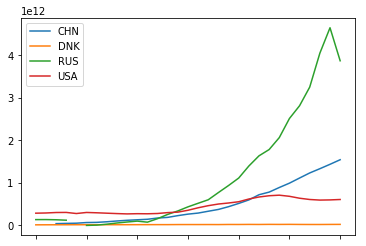

In [40]:
import matplotlib.pyplot as plt


ts_df = df.iloc[c_code_df.index, 31:-1].T
ts_df = ts_df.rename(columns=dict(c_code_df))
ts_df
ts_df.plot()

Since this plot may be a bit misleading, we will 'normalize' all expeditures to Euro, so that they are better comparible.

In [37]:
import requests


# http://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html#dev
response = requests.get('http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml')
response.text

'<?xml version="1.0" encoding="UTF-8"?>\n<gesmes:Envelope xmlns:gesmes="http://www.gesmes.org/xml/2002-08-01" xmlns="http://www.ecb.int/vocabulary/2002-08-01/eurofxref">\n\t<gesmes:subject>Reference rates</gesmes:subject>\n\t<gesmes:Sender>\n\t\t<gesmes:name>European Central Bank</gesmes:name>\n\t</gesmes:Sender>\n\t<Cube>\n\t\t<Cube time=\'2019-03-04\'>\n\t\t\t<Cube currency=\'USD\' rate=\'1.1337\'/>\n\t\t\t<Cube currency=\'JPY\' rate=\'126.91\'/>\n\t\t\t<Cube currency=\'BGN\' rate=\'1.9558\'/>\n\t\t\t<Cube currency=\'CZK\' rate=\'25.621\'/>\n\t\t\t<Cube currency=\'DKK\' rate=\'7.4616\'/>\n\t\t\t<Cube currency=\'GBP\' rate=\'0.85775\'/>\n\t\t\t<Cube currency=\'HUF\' rate=\'315.84\'/>\n\t\t\t<Cube currency=\'PLN\' rate=\'4.2989\'/>\n\t\t\t<Cube currency=\'RON\' rate=\'4.7412\'/>\n\t\t\t<Cube currency=\'SEK\' rate=\'10.5543\'/>\n\t\t\t<Cube currency=\'CHF\' rate=\'1.1352\'/>\n\t\t\t<Cube currency=\'ISK\' rate=\'136.20\'/>\n\t\t\t<Cube currency=\'NOK\' rate=\'9.7633\'/>\n\t\t\t<Cube curr

In [38]:
from bs4 import BeautifulSoup
# Will be covered 26/3U

xml = BeautifulSoup(response.text, 'html5lib')
rate_list = xml.cube.cube.findAll("cube") # [0]['rate']

currency = ['USD', 'DKK', 'RUB', 'CNY']
rate_dict = dict.fromkeys(currency)
for r in rate_list:
    if r['currency'] in currency:
        rate_dict[r['currency']] = float(r['rate'])
        print(r['rate'])
rate_dict

1.1337
7.4616
74.5435
7.5985


{'USD': 1.1337, 'DKK': 7.4616, 'RUB': 74.5435, 'CNY': 7.5985}

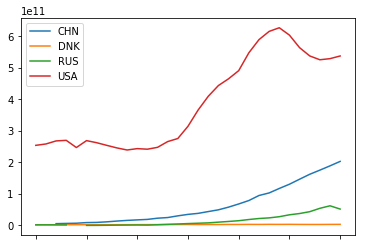

In [39]:
ts_df['DNK'] = ts_df['DNK'] / rate_dict['DKK']
ts_df['USA'] = ts_df['USA'] / rate_dict['USD']
ts_df['CHN'] = ts_df['CHN'] / rate_dict['CNY']
ts_df['RUS'] = ts_df['RUS'] / rate_dict['RUB']
ts_df.plot()

**OBS!!!** Be careful, the graph above is still not really well suited for comparison as currency exchange rates are not fix. However, the code above normalizes just relying on the most current exchange rate from the European Central Bank. See the exercise block in the bottom for how to fix that isuue!

## PS

In case you have to sort the data in your `DataFrames` see the methods `sort_index` and `sort_values`.


```python
df.sort_index(axis=1, ascending=True)
df.sort_values(by='Country Code')
```

In [41]:
df.sort_index?

In [ ]:
df.sort_values?